In [1]:
# sys_msg = '''You are a good and fair evaluator. Given the predicted rules of the game and the groudtruth rules. Please score the predicted rules based on the following criteria:
# 1. Precision: Select the relevant rules from predicted rules and . 
# 2. Recall: The fraction of the groundtruth rules that are correctly predicted.`
# 3. F1: The harmonic mean of precision and recall.
# You should return a dictionary with the following keys: precision, recall, f1. Each key should have a value between 0 and 100.
# '''
user_msg = '''Predicted rule: {predicted_rules}
Groundtruth rule: {groundtruth_rules}'''

In [2]:
sys_msg = '''You are a good and fair evaluator. Given the predicted rules of the game and the groudtruth rules. Please score (0-100) the predicted rules to evaluate the extent to which the predicted rules cover the groundtruth rules.

'''

In [3]:
sys_msg_select = '''Given the groundtruth rules and the predicted rules of game, please decide whether the predicted rule is correct based the groundtruth rules. 
If the predicted rule is correct, please return True. If the predicted rule is totally not mentioned in the groundtruth rules, please return Unknown. If the predicted rule is not correct, please return False.
You should repsond with the following format:
Reasoning: {the reasoning of your decision}
Decision: {True/False/Unknown}
'''

In [4]:
sys_msg_select = '''Given the groundtruth rules and the predicted rules of game, please decide whether the predicted rule is correct based the groundtruth rules. 
If the predicted rule is totally not mentioned in the groundtruth rules, please return -1. Otherwise, please score the predicted rule to evaluate the correctness of the predicted rule.
You should repsond with the following format:
Reasoning: {the reasoning of your decision}
score: {-1/0-1}
'''

In [5]:
sys_msg = '''You are a good and fair evaluator. Given the predicted rules of the game and the groudtruth rules. Please score the predicted rules.
1. Precision (0-100): the correctness of the predicted rules.
2. Recall (0-100): the extent to which the predicted rules cover the groundtruth rule.
Pleses return a dictionary with the following keys: precision, recall. Each key should have a value between 0 and 100.'''

In [26]:
sys_msg_recall = '''You are a good and fair evaluator. Given the all predicted rules of the game and one groundtruth rules. Please give the score to evaluate whether the grountruth rule is correctly predicted. If the groundtruth rule is totally correctly predicted, please return 1. If the groundtruth rule is not mentioned in the predicted rules or is totally falsely predicted, please return 0. If the groundtruth rule is partially correctly predicted, please return a score between 0 and 1.
You should repsond with the following format:
Reasoning: {the reasoning of your decision}
score: {0-1}
'''



In [22]:
# GPT-4 as evaluator
from agent import *
from tqdm import tqdm

selector = AnyOpenAILLM(temperature=0, sys_msg=sys_msg_select)
scorer = AnyOpenAILLM(temperature=0, sys_msg=sys_msg)
recaller = AnyOpenAILLM(temperature=0, sys_msg=sys_msg_recall)

# read the predicted rules
predicted_path = 'final_world/world_terr_ach/induction_from_reflexion_CC/202405302001-gpt-4-0125-preview/reflection.txt'

truth_path = 'final_world/world_terr_ach/world_rules_match.txt'

predicted_rules = []
answer_predicted_rules = dict()
with open(predicted_path, 'r') as f:
    for line in f:
        predicted_rules.append(line.strip())

# read the ground truth rules
truth_rules = []
with open(truth_path, 'r') as f:
    for line in f:
        truth_rules.append(line.strip())

In [7]:



truth_id = set()
false_rules = []
truth_rule = []
all_acc_score = 0
all_pred_score = 0
for each_rule in tqdm(predicted_rules):
    user_msg_info = user_msg.format(predicted_rules=each_rule, groundtruth_rules=truth_rules)
    user_msg_prompt = [{"role": "user", "content": user_msg_info}]
    res = selector(user_msg_prompt)
    score = float(res.split('score: ')[1])
    if score == -1:
        continue
    all_acc_score += score
    all_pred_score += 1
    answer_predicted_rules[each_rule] = score

    # if "Unknown" in res:
    #     predicted_rules.remove(each_rule)
    #     print(each_rule)
    # if "False" in res:
    #     false_rules.append(each_rule)
    #     # print(each_rule)
    # if "True" in res:
    #     truth_rule.append(each_rule)
        # print(each_rule)
    # parse the list format
    # import re
    # result = re.findall(r'\d+', result_list)
    # truth_rule = ''
    # for i in range(len(result)):
    #     truth_id.add(int(result[i]))
    #     truth_rule += truth_rules[int(result[i])] + '\n'
    # print(truth_rule)
    # user_msg_info = user_msg.format(predicted_rules=each_rule, groundtruth_rules=truth_rule)
    # user_msg_prompt = [{"role": "user", "content": user_msg_info}]
    # result = scorer(user_msg_prompt)
    # print(result)



In [8]:
# save dict to file
import json
with open("answer_predicted_rules.json", "w") as f:
    json.dump(answer_predicted_rules, f)

In [9]:
answer_predicted_rules

{'0: Interacting with certain stone blocks can reveal hidden resources or change the block type, and the player can obtain resources not directly related to the block they interact with.': 0.5,
 "1: The action move_down does not change the player's location under certain conditions, possibly due to an obstacle or game mechanic preventing movement in that direction.": 1.0,
 '3: The player can move to an adjacent sand block.': 1.0,
 "5: Moving up on the path changes the player's position relative to surrounding objects without affecting the player's health, food, drink, or energy levels.": 1.0,
 '8: The player can move freely on paths and stone in the four cardinal directions as long as the way is clear.': 0.5,
 '10: The player can move from the path to the iron block.': 0.9,
 '11: Encountering skeletons or arrows can cause the player to lose health.': 0.5,
 '12: Interacting with certain coal blocks can trigger environmental changes, such as turning the coal block into lava.': 1.0,
 '14:

In [10]:
all_acc_score / all_pred_score

0.6741312741312743

In [23]:
process_answer_rules = dict()
for each_rule, value in answer_predicted_rules.items():
    try:
        if ": " not in each_rule:
            process_answer_rules[each_rule] = value
        else:
            rule_text = each_rule.split(': ')[1]
            
            process_answer_rules[rule_text] = value
    except:
        print(each_rule)
        continue

In [24]:
process_answer_rules

{'Interacting with certain stone blocks can reveal hidden resources or change the block type, and the player can obtain resources not directly related to the block they interact with.': 0.5,
 "The action move_down does not change the player's location under certain conditions, possibly due to an obstacle or game mechanic preventing movement in that direction.": 1.0,
 'The player can move to an adjacent sand block.': 1.0,
 "Moving up on the path changes the player's position relative to surrounding objects without affecting the player's health, food, drink, or energy levels.": 1.0,
 'The player can move freely on paths and stone in the four cardinal directions as long as the way is clear.': 0.5,
 'The player can move from the path to the iron block.': 0.9,
 'Encountering skeletons or arrows can cause the player to lose health.': 0.5,
 'Interacting with certain coal blocks can trigger environmental changes, such as turning the coal block into lava.': 1.0,
 'Interacting with a tree block 

In [ ]:
# import json
# with open("answer_predicted_rules.json", "w") as f:
#     json.dump(answer_predicted_rules, f)

In [8]:
# read json file
import json
with open("answer_predicted_rules.json", "r") as f:
    answer_predicted_rules = json.load(f)

In [9]:
process_answer_rules = dict()
for each_rule, value in answer_predicted_rules.items():
    try:
        if ": " not in each_rule:
            process_answer_rules[each_rule] = value
        else:
            rule_text = each_rule.split(': ')[1]
            
            process_answer_rules[rule_text] = value
    except:
        print(each_rule)
        continue

In [50]:
# read each reflection rules
file_rules = []
file_path = "final_world/world_terr_ach/induction_from_reflexion_CC/202405302001-gpt-4-0125-preview/reflection.txt"
with open(file_path, 'r') as f:
    for line in f:
        file_rules.append(line.strip())

scores_file = 0
valid_rules = 0
import copy
file_rules_copy = copy.deepcopy(file_rules)
for each_rule in file_rules:
    if ": " in each_rule:
        each_rule_text = each_rule.split(': ')[1]
    else:
        print(each_rule)
        each_rule_text = each_rule
    if each_rule_text in process_answer_rules:
        scores_file += process_answer_rules[each_rule_text]
        valid_rules += 1
    # else:
    #     file_rules_copy.remove(each_rule)

# calculate the final score
print("precision: ", scores_file/valid_rules)



202:
1. Entering water decreases health by 1.
2. Being on grass may heal the player or allow health regeneration under certain conditions.
3. Interacting ("do") with the grass block without specific tools or actions yields no change.
4. Interacting with certain objects (like the stone block, though this might be a misinterpretation or a game inconsistency) consumes energy and can yield resources, such as wood.
precision:  0.6741312741312743


In [47]:
valid_rules
len(file_rules_copy)

633

In [33]:
memory_episodes = [0, 1, 2, 3, 4]
precision = [0.6277777777777778, 0.6382978723404256, 0.6355491329479769, 0.6551569506726457, 0.6741312741312743]
recall = [0.27586206896551724, 0.26448275862068965, , ,0.75]

SyntaxError: invalid syntax (1427937212.py, line 3)

In [48]:
file_rules_copy

['0:',
 '1: Interacting (doing) with certain blocks can transform them and yield resources.',
 "2: Moving right from this specific location does not change the player's position or surroundings.",
 "3: Making a wood sword can decrease the player's health.",
 '4: The player cannot place a table without meeting specific conditions or having specific items.',
 '5: The player can move across different types of terrain (path, stone, grass) without immediate resource consumption or restrictions.',
 '6: Encountering skeletons or arrows can cause the player to lose health.',
 '7: Sleeping without successfully restoring energy causes health to decrease.',
 "8: Moving changes the player's position in the game world, allowing exploration and interaction with different objects, without affecting the player's health, food, drink, energy, or inventory.",
 "9: Sleeping alone does not automatically restore the player's energy to full.",
 '10: Sleeping restores health and energy over time but does not 

In [51]:
recall_score = 0
score_dict = dict()
for each_gt_rule in tqdm(truth_rules):
    user_msg_info = user_msg.format(predicted_rules=file_rules_copy, groundtruth_rules=each_gt_rule)
    user_msg_prompt = [{"role": "user", "content": user_msg_info}]
    res = recaller(user_msg_prompt).lower()
    score = float(res.split('score: ')[1])
    recall_score += score
    score_dict[each_gt_rule] = score
    print(score)
print("recall: ", recall_score/len(truth_rules))

  3%|▎         | 1/29 [00:08<03:51,  8.28s/it]

0.75


  7%|▋         | 2/29 [00:15<03:26,  7.65s/it]

0.5


 10%|█         | 3/29 [00:22<03:06,  7.18s/it]

0.5


 14%|█▍        | 4/29 [00:26<02:36,  6.26s/it]

0.5


 17%|█▋        | 5/29 [00:31<02:18,  5.78s/it]

0.5


 21%|██        | 6/29 [00:36<02:01,  5.29s/it]

0.0


 24%|██▍       | 7/29 [00:41<01:57,  5.33s/it]

0.0


 28%|██▊       | 8/29 [00:46<01:49,  5.20s/it]

0.0


 31%|███       | 9/29 [00:52<01:47,  5.38s/it]

0.0


 34%|███▍      | 10/29 [00:56<01:34,  4.99s/it]

1.0


 38%|███▊      | 11/29 [01:01<01:31,  5.11s/it]

1.0


 41%|████▏     | 12/29 [01:07<01:31,  5.38s/it]

0.5


 45%|████▍     | 13/29 [01:12<01:24,  5.30s/it]

0.5


 48%|████▊     | 14/29 [01:16<01:13,  4.90s/it]

0.0


 52%|█████▏    | 15/29 [01:22<01:09,  4.97s/it]

0.0
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
Error code: 429 - {'error': {'message': 'You exceeded your curr

 52%|█████▏    | 15/29 [01:58<01:50,  7.92s/it]


KeyboardInterrupt: 

In [52]:
29 * 0.2655172413793104 - 2.25 - 1.5

3.950000000000001

In [62]:
# 00: 0.22586206896551728
# 01: 0.2413793103448276
# 02: 0.2672413793103448
# 03: 0.2652413793103448
# 04: 0.2655172413793104

terrain: 0.5625
survival: 0.25
achievement: 0.208

'Reasoning: The groundtruth rule involves interacting with lava using a sapling to yield a drink and convert it to a stone block. None of the predicted rules mention interacting with lava, using a sapling for interaction, or the specific outcome of obtaining a drink and converting lava to a stone block. Therefore, the predicted rules do not cover the groundtruth rule at all.\nScore: 0'

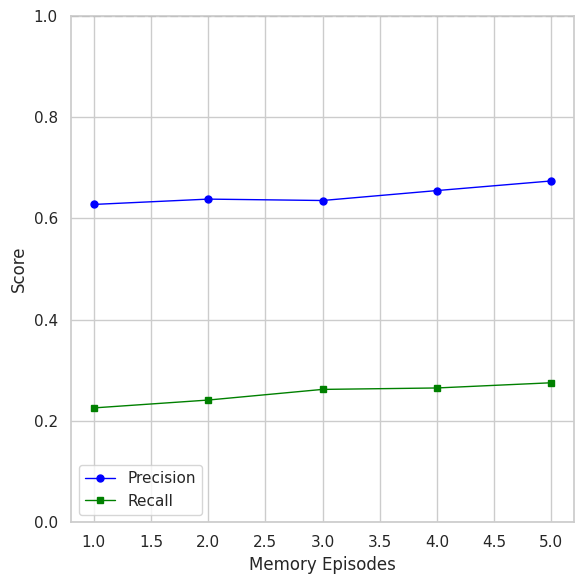

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 00: 0.22586206896551728
# 01: 0.2413793103448276
# 02: 0.2672413793103448
# 03: 0.2652413793103448
# 04: 0.2655172413793104
# Example data
memory_episodes = [1, 2, 3, 4, 5]
precision = [0.6277777777777778, 0.6382978723404256, 0.6355491329479769, 0.6551569506726457, 0.6741312741312743]
recall = [0.22586206896551728, 0.2413793103448276, 0.262413793103448, 0.2652413793103448, 0.2755172413793104]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the data
ax.plot(memory_episodes, precision, marker='o', color='blue', linestyle='-', linewidth=1, markersize=5, label='Precision')
ax.plot(memory_episodes, recall, marker='s', color='green', linestyle='-', linewidth=1, markersize=5, label='Recall')

# Adding a horizontal line for reference
ax.axhline(y=1.0, color='gray', linestyle='--')



# Setting labels and title
ax.set_xlabel('Memory Episodes')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)

# Adding legend
ax.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

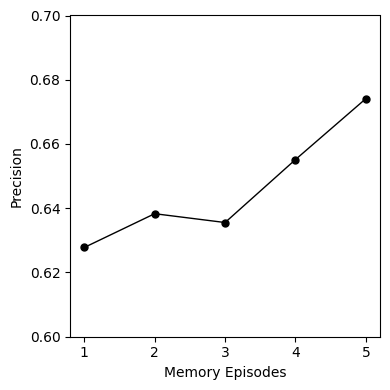

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Example data
memory_episodes = memory_episodes  
precision = precision

# Create figure and plot space
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the data
ax.plot(memory_episodes, precision, marker='o', color='black', linestyle='-', linewidth=1, markersize=5)

# Adding a horizontal line
ax.axhline(y=1.0, color='gray', linestyle='--')

# Adding annotation
ax.annotate('Precision', xy=(2, 1.0), xytext=(3, 1.02),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Setting labels and title
ax.set_xlabel('Memory Episodes')
ax.set_ylabel('Precision')
ax.set_ylim(0.6, 0.7)

# Show plot
plt.tight_layout()
plt.show()

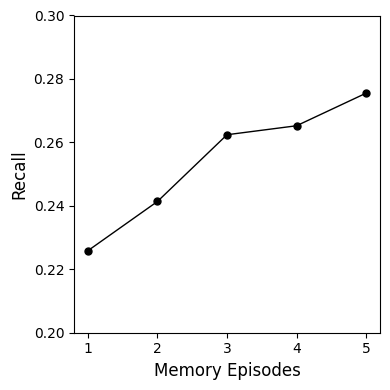

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Example data
memory_episodes = memory_episodes  
recall = recall

# Create figure and plot space
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the data
ax.plot(memory_episodes, recall, marker='o', color='black', linestyle='-', linewidth=1, markersize=5)

# Adding a horizontal line
ax.axhline(y=1.0, color='gray', linestyle='--')

# Adding annotation
ax.annotate('Recall', xy=(2, 1.0), xytext=(3, 1.02),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Setting labels and title
ax.set_xlabel('Memory Episodes', fontsize=12)
ax.set_ylabel('Recall',  fontsize=12)
ax.set_ylim(0.2, 0.3)

# Show plot
plt.tight_layout()
plt.show()

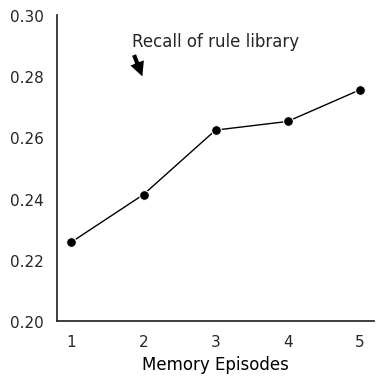

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
memory_episodes = memory_episodes
recall = recall

# Create a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({
    'Memory Episodes': memory_episodes,
    'Recall': recall
})

# Set the style
sns.set(style="white")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the data using Seaborn
custom_palette = sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"])  # Light pink, gold, light blue
sns.lineplot(data=data, x='Memory Episodes', y='Recall', marker='o', color='black', linewidth=1, markersize=7, ax=ax)

# Adding a horizontal line
ax.axhline(y=1.0, color='gray', linestyle='--')

# Adding annotation
ax.annotate('Recall of rule library', xy=(2, 0.279), xytext=(3, 0.29),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Setting labels and title
ax.set_xlabel('Memory Episodes', fontsize=12, color='black')
ax.set_ylabel('', fontsize=12, color='black')
ax.set_ylim(0.2, 0.3)

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.savefig('recall.pdf', format='pdf')
plt.show()

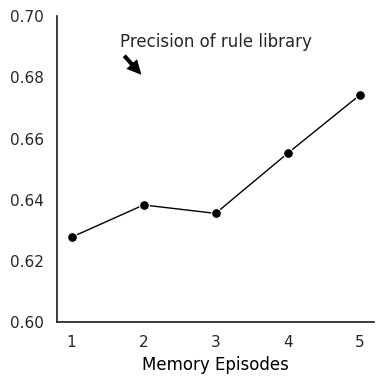

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
memory_episodes = memory_episodes
precision = precision

# Create a DataFrame for Seaborn
import pandas as pd
data2 = pd.DataFrame({
    'Memory Episodes': memory_episodes,
    'Precision': precision
})

# Set the style
sns.set(style="white")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the data using Seaborn
custom_palette = sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"])  # Light pink, gold, light blue
sns.lineplot(data=data2, x='Memory Episodes', y='Precision', marker='o', color='black', linewidth=1, markersize=7, ax=ax)

# Adding a horizontal line
ax.axhline(y=1.0, color='gray', linestyle='--')

# Adding annotation
ax.annotate('Precision of rule library', xy=(2, 0.68), xytext=(3, 0.69),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Setting labels and title
ax.set_xlabel('Memory Episodes', fontsize=12, color='black')
ax.set_ylabel('', fontsize=12, color='black')
ax.set_ylim(0.6, 0.7)

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.savefig('precision.pdf', format='pdf')
plt.show()

In [ ]:
kinds_rule = ['terrain', 'survival', 'task']
kinds_score = [0.5625, 0.25, 0.208]




/tmp/ipykernel_224568/47702073.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rule Type', y='Recall Score', data=data, palette=sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"]), width=0.3)


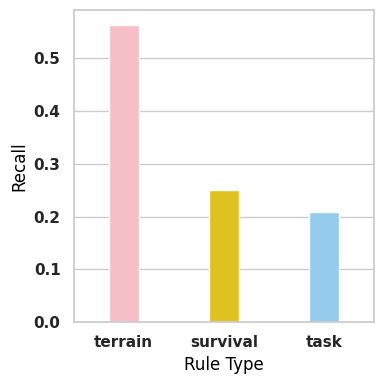

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
kinds_rule = ['terrain', 'survival', 'task']
recall_score = [0.5625, 0.25, 0.208]

# Create a DataFrame for Seaborn
data = pd.DataFrame({
    'Rule Type': kinds_rule,
    'Recall Score': recall_score
})

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='Rule Type', y='Recall Score', data=data, palette=sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"]), width=0.3)
# Setting labels and title
plt.xlabel('Rule Type', fontsize=12, color='black')
plt.ylabel('Recall', fontsize=12, color='black')
# plt.title('Recall of rule type', fontsize=13, color='black')

# Show plot
plt.tight_layout()
plt.savefig('recall_score_by_rule_type.pdf', format='pdf')
plt.show()

/tmp/ipykernel_224568/3633977574.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rule Type', y='Recall Score', data=data, palette=sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"]), width=0.5)


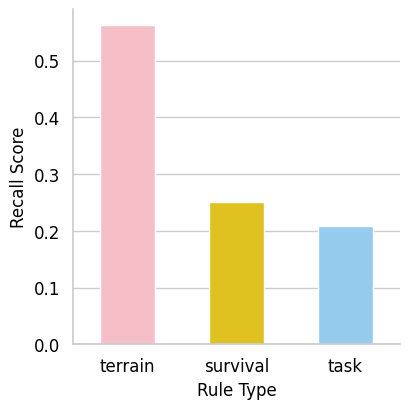

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
kinds_rule = ['terrain', 'survival', 'task']
recall_score = [0.5625, 0.25, 0.208]

# Create a DataFrame for Seaborn
data = pd.DataFrame({
    'Rule Type': kinds_rule,
    'Recall Score': recall_score
})

# Set the style
sns.set(style="whitegrid")

# Set font scale
sns.set_context("notebook", font_scale=0.28)

# Create the bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='Rule Type', y='Recall Score', data=data, palette=sns.color_palette(["#FFB6C1", "#FFD700", "#87CEFA"]), width=0.5)

# Setting labels and title with thicker fonts
plt.xlabel('Rule Type', fontsize=12, weight='medium', color='black')
plt.ylabel('Recall Score', fontsize=12, weight='medium', color='black')
# plt.title('Recall Score by Rule Type', fontsize=14, weight='medium', color='black')

# Modify tick parameters for thicker font
plt.xticks(fontsize=12, weight='medium', color='black')
plt.yticks(fontsize=12, weight='medium', color='black')

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.savefig('recall_score_by_rule_type2.pdf', format='pdf')
plt.show()